# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [23]:
### YOUR CODE HERE ###

# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [3]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [4]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [5]:
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [6]:
df_original['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

- satisfied       71087
- dissatisfied    58793

**Question:** What percentage of customers were satisfied? 

- 54.7% of customers are satisfied customers among the data provided

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [7]:
if(df_original.isna().sum().sum() == 0):
    print('\nThere are no missing values in the data set')
else:
    print('\nThere are',df_original.isna().sum().sum(),'missing values in the data set')
    print('\n')
    print(df_original.isna().sum())


There are 393 missing values in the data set


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

- checking the number of rows and columns in a dataset is a fundamental step in the data analysis process. It provides essential information about the dataset's size, structure, and integrity, guiding subsequent data exploration, analysis, and modeling activities.

### Check the number of rows and columns in the dataset

In [9]:
df_original.shape

(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [10]:
df_subset = df_original.dropna(axis = 0).reset_index(drop = True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [11]:
if(df_subset.isna().sum().sum() == 0):
    print('\nThere are no missing values in the data set')
else:
    print('\nThere are',df_subset.isna().sum().sum(),'missing values in the data set')
    print('\n')
    print(df_subset.isna().sum())


There are no missing values in the data set


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [12]:
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [15]:
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [16]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [17]:
df_subset = pd.get_dummies(df_subset, drop_first = True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [18]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [19]:
y = df_subset["satisfaction"]

X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [35]:
RESULTS = pd.DataFrame()
MODEL_EVAL = DecisionTreeClassifier()
MODEL_EVAL.fit(X_train, y_train)
dt_pred = MODEL_EVAL.predict(X_test)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

- Decision trees offer several advantages compared to other machine learning models:

    1. Decision trees are highly interpretable, making them easy to understand and explain.
    2. Decision trees do not make assumptions about the distribution of the data or the relationship between variables.
    3. They can handle both numerical and categorical data without the need for data transformation or scaling.
    4. Decision trees can capture non-linear relationships between features and the target variable.
    5. Decision trees provide a measure of feature importance, indicating which features are most influential in making predictions.
    6. Decision trees are robust to outliers and missing values in the data.
    7. Decision trees suitable for large datasets or real-time applications where computational efficiency is important.
    8. Decision trees can be easily combined into ensemble methods, such as random forests or gradient boosting, to further improve predictive performance.

- Overall, decision trees are versatile and powerful machine learning models that offer interpretability, flexibility, and robustness, making them well-suited for a wide range of classification and regression tasks.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [37]:
RESULTS = pd.DataFrame()
name = "DECISION TREE"
ACCURACY = accuracy_score(y_test, dt_pred)
PRECISION = precision_score(y_test, dt_pred)
RECALL = recall_score(y_test, dt_pred)
F1_SCORE = f1_score(y_test, dt_pred)
RESULTS = RESULTS.append(pd.Series([name,ACCURACY,PRECISION,RECALL,F1_SCORE]),ignore_index=True)
RESULTS.columns = ['MODEL_NAME','ACCURACY','PRECISION','RECALL','F1-SCORE']

print('\nRESULTS USING DECISION TREE MACHINE LEARNING ALGORITHMS:\n')
RESULTS.style.set_properties(**{'border': '1.3px solid black','color': 'blue'}).hide_index()


RESULTS USING DECISION TREE MACHINE LEARNING ALGORITHMS:



MODEL_NAME,ACCURACY,PRECISION,RECALL,F1-SCORE
DECISION TREE,0.935098,0.939069,0.941997,0.940530


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

- Identifying the optimal value of max_depth that maximizes model performance on validation data while avoiding overfitting. Experimenting with different values of max_depth and evaluating the model's performance using appropriate validation metrics can guide the selection of the optimal hyperparameter value.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

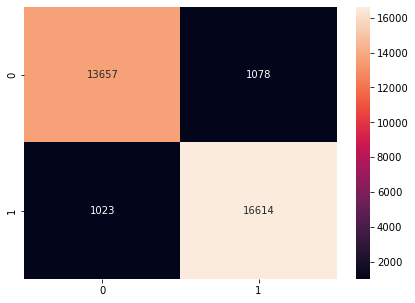

In [38]:
CM = metrics.confusion_matrix(y_test, dt_pred,labels=[0, 1])

CM_DF = pd.DataFrame(CM, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])

plt.figure(figsize = (7,5))

sns.heatmap(CM_DF, annot=True ,fmt='g')

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

- In the above confusion matrix, we can see that True positives and true negatives are relatively very high compared to false negatives and false positives

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

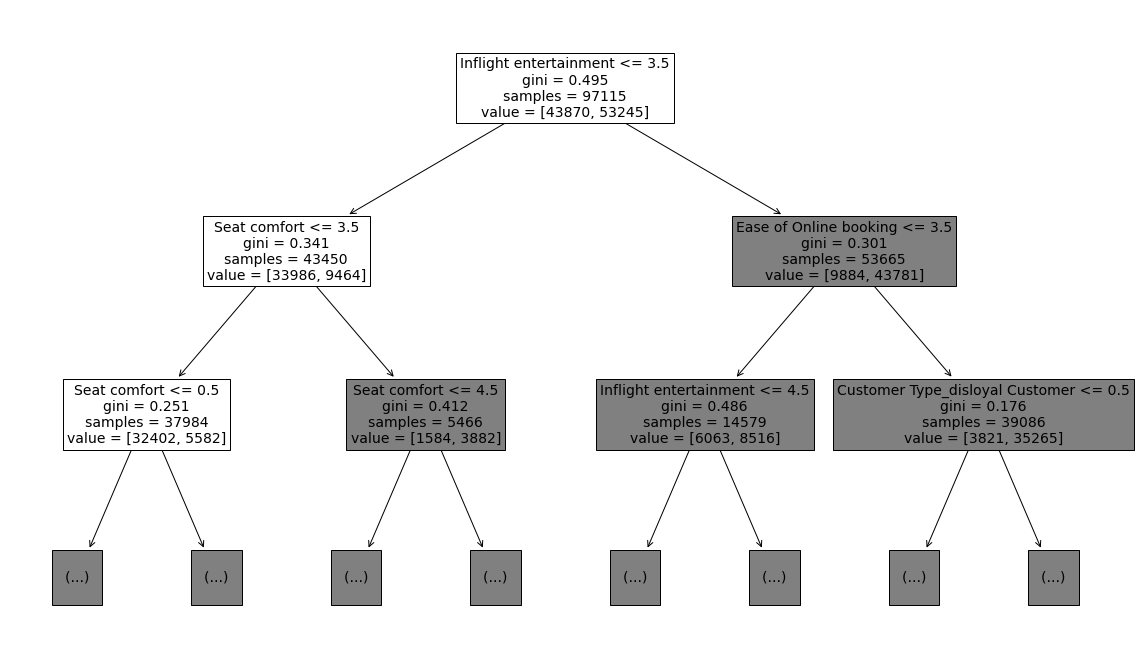

In [39]:
plt.figure(figsize=(20,12))
plot_tree(MODEL_EVAL, max_depth=2, fontsize=14, feature_names=X.columns);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [40]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

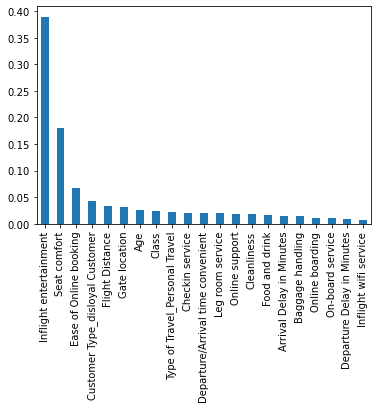

In [41]:
importances = MODEL_EVAL.feature_importances_

features_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
features_imp.plot.bar(ax=ax);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

- Determining the best combination of values for hyperparameters in a decision tree involves a process called hyperparameter tuning. Here are several techniques commonly used to find the optimal combination of hyperparameters. The algorithm evaluates the model's performance using cross-validation for each combination of hyperparameters in the grid. The combination of hyperparameters that yields the best performance metric (e.g., accuracy, F1-score) on the validation set is selected.

### Compute the best combination of values for the hyperparameters

In [52]:
from sklearn.model_selection import RandomizedSearchCV

def BEST_MODEL_PARAMS(MODELS,X_TRAIN_N,Y_TRAIN):
    BEST_SCORE = []
    MODEL_NAME = []
    for name, model, params in MODELS:
        #CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        SEARCH_BEST = RandomizedSearchCV(model, n_iter=50, scoring='accuracy',
                                         param_distributions = params, n_jobs=10, cv=3, random_state=1)
        TUNE_RESULTS = SEARCH_BEST.fit(X_TRAIN_N, Y_TRAIN)
        print(name)
        print('*******************************************************************************************')
        print('BEST SCORE: %s' % TUNE_RESULTS.best_score_)
        print('BEST PARAMETERS: %s' % TUNE_RESULTS.best_params_)
        print('\n\n')
        MODEL_NAME.append(name)
        BEST_SCORE.append(TUNE_RESULTS.best_score_)
    return MODEL_NAME, BEST_SCORE, TUNE_RESULTS.best_params_

DT_BEST = []

DT_BEST.append(('DECISION TREE', DecisionTreeClassifier(),{'max_depth': [2, 3, 5, 10, 20], 
                                                              'min_samples_leaf': [5, 10, 20, 50, 100], 
                                                              'criterion': ["gini", "entropy"]}))
BEST_RESULTS = BEST_MODEL_PARAMS(DT_BEST,X_train,y_train)

BEST_RESULTS

DECISION TREE
*******************************************************************************************
BEST SCORE: 0.9362096489777
BEST PARAMETERS: {'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'gini'}





(['DECISION TREE'],
 [0.9362096489777],
 {'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'gini'})

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

- BEST SCORE: 0.936137569272239
- BEST PARAMETERS: {'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'gini'}

<strong> Question: What was the best average validation score? </strong>

In [51]:
print('BEST AVERAGE VALIDATION SCORE:',BEST_RESULTS[1])

BEST AVERAGE VALIDATION SCORE: [0.9360757916207092]


BEST AVERAGE VALIDATION SCORE: [0.9360757916207092]

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [53]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.94375,0.935863,0.951779,0.938835


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

- There is no significant improvement in performance after hyper parameter tuning as accuracy earlier was at 93.4 and shown only slight improvement of 93.8 which is not much significant in the context.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

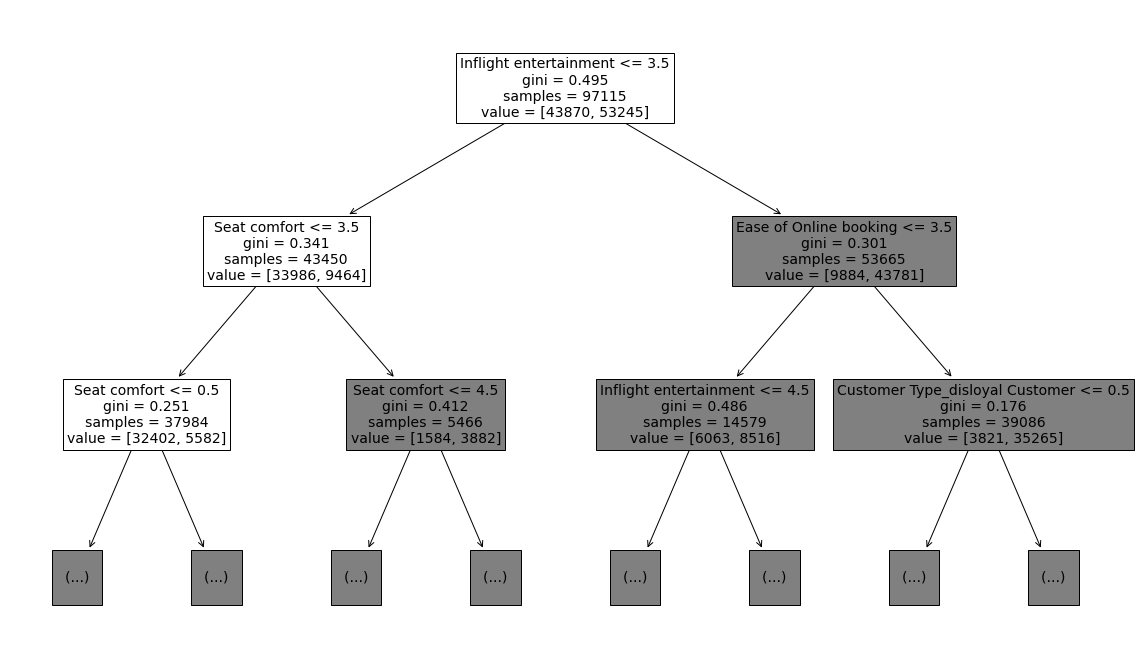

In [54]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

Which features did the model use first to sort the samples?

## Conclusion

**What are some key takeaways that you learned from this lab?**

- You can effectively leverage decision trees in your machine learning projects and make informed decisions about model selection, hyperparameter tuning, and data preprocessing.

**What findings would you share with others?**

- Model scores, various tuning methods incorporated, features selected, visuals

**What would you recommend to stakeholders?**
 
- Model has accuracy of 93.8% which is very good in the long run and also shows that it can predict accurately as the model is further trained.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged